<div align="center">

**Lab Report Title**  
*Field Effect Transistor Applications*

**Course:** ELECTRONICS 2 

**Date:** 28/05/2025


**Group Members**

| Full Name                 | Matriculation No. |
| ------------------------- | ----------------- |
| Ashu Nkongho Tekoh        | 2756129           |
| Enes Gjana                | 2770615           |
| Elhama Adel               | 2756781           |


</div>

In [416]:
#Load all Import

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Introduction and Objective

The objectives of the second lab task are the understanding of three different applications for a
MOSFET and the training of measuring those kinds of circuits. In the first task, we use the MOSFET as
a simple switch, in the second task to realize a current source and in the third task as a single-ended
amplifier. All applications are common when it comes to circuit design.



# Preparation

## Part 1: MOSFET as Switch 
**Objective:** Switch a 50 mA load at 5 V using a BS108 n-channel MOSFET driven by a 3.3 V PWM (50 % duty).

1. **Equivalent load resistance**  
   $$R_L = \frac{V_0}{I_D} = \frac{5\text{ V}}{50\text{ mA}} = {100\;\Omega}.$$

2. **Switching‐loss analysis**  
   - Instantaneous power:  $p(t) = v_{DS}(t)\cdot i_D(t).$ 
   
   - During each edge (rise/fall time $t_r = t_f = 20\text{ ns}$), approximate the overlap energy:  
     $$
       E_{\rm edge}
       \approx \frac{1}{6}\,V_0\cdot I_D \cdot t_{\rm edge}
       = \tfrac12\,(5\text{ V})(0.05\text{ A})(20\times10^{-9}\text{ s})
       = 0.83\times10^{-9}\text{ J}.
     $$  
   - Total switching energy per PWM period: $E_{\rm sw}=2E_{\rm edge}.$  
   - Average switching power:  
                              $$
                                P_{\rm sw} = E_{\rm sw}\,f_{\rm PWM}
                                = 1.66\times10^{-9}\,\text{J}\;\times f_{\rm PWM}.
                              $$ 
   - **Worst‐case** $p(t)$ peaks at mid‐transition (where $V_o$ and $I_D$ overlap most significantly) either on rising/falling edge:
        $$P_{peak}\approx \frac{V_0 \times I_D}{4} 
        = 62.5 mW
        $$.
  
3. **Simulation action (See Calculation under Data Processing)**  
   - Build the BS108 switch circuit in SPICE / LT-Spice.  
   - Plot $v_{DS}(t)$, $i_D(t)$, and compute $p(t)$.  
   - Identify peak power during a switching edge and verify the triangular approximation.  
   - Sweep $f_{\rm PWM}$ to observe linear scaling of $P_{\rm sw}$.
  
   
   

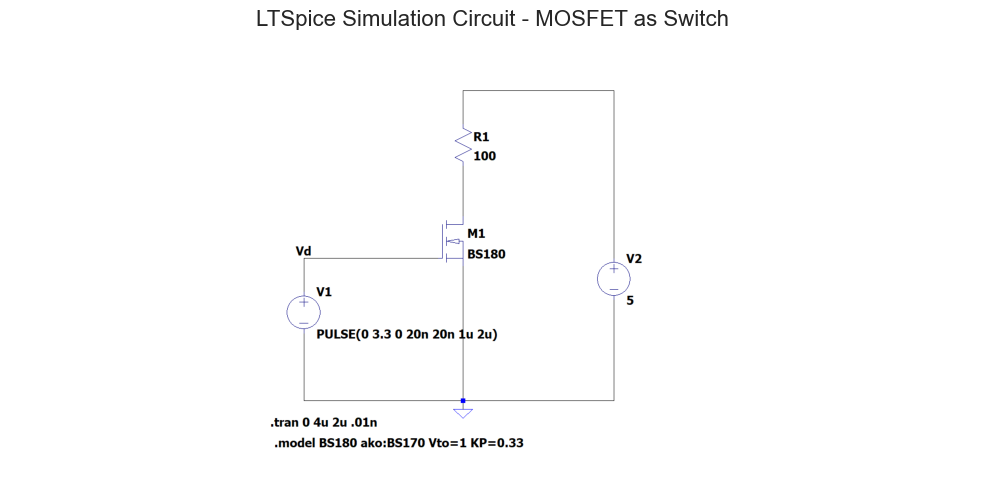

In [417]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/Task_1.png'  # change string to name of LTspice image
img_title = "LTSpice Simulation Circuit - MOSFET as Switch" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

In [418]:
from components.data_import import import_measurement_data, import_simulation_data
from components.data_processing import process_sim_data,process_single_csv
import pandas as pd
# Use the code below if we want to read single .csv files
# Pull a .csv and .txt files in the data folder

IS_DATA_AVAILABLE = True
simulation_data_path = "../data/Prep_Data/Mosfet_Switch.txt" # Enter path to simulation data
part_2_data_path = "../data/Prep_Data/Mosfet_Current_Mirror.txt" # Enter path to simulation data
#oscilloscope_data_path_ch1 = "../data/tek0001CH1.csv" # Enter path to chanel 1 oscilloscope data
#oscilloscope_data_path_ch2 = "../data/tek0001CH2.csv" # Enter path to chanel 2 osilloscope data


cleaned_sim_data = pd.DataFrame()
cleaned_ch1_data = pd.DataFrame()
cleaned_ch2_data = pd.DataFrame()

part_2_data = pd.DataFrame()

if IS_DATA_AVAILABLE:
    sim_data = import_simulation_data(simulation_data_path)
    data_2 = import_simulation_data(part_2_data_path)
    #ch1_data = import_measurement_data(oscilloscope_data_path_ch1)
    #ch2_data = import_measurement_data(oscilloscope_data_path_ch2)
    
    # Processing the data

    cleaned_sim_data = process_sim_data (sim_data)
    part_2_data = process_sim_data (data_2)
    #cleaned_ch1_data = process_single_csv(ch1_data)
    #cleaned_ch2_data =process_single_csv(ch2_data)

[ 15-06-2025, 17:33:18 ] 20 root - INFO - Successfully imported simulation data from ../data/Prep_Data/Mosfet_Switch.txt


,time,V(vd),V(vd)*Id(M1),Id(M1)
0,0.000000e+00,0.000000,0.000000e+00,4.491302e-07
1,5.524459e-13,0.000091,3.669197e-11,4.025291e-07
2,1.657338e-12,0.000273,8.461383e-11,3.094186e-07
3,1.252957e-10,0.020674,-2.052304e-07,-9.927085e-06
4,2.489340e-10,0.041074,-8.157576e-07,-1.986062e-05


[ 15-06-2025, 17:33:18 ] 20 root - INFO - Successfully imported simulation data from ../data/Prep_Data/Mosfet_Current_Mirror.txt


,rvar,I(Rl),I(Rv)
0,1.000000,0.01016,0.010141
1,1.047129,0.01016,0.010141
2,1.096478,0.01016,0.010141
3,1.148154,0.01016,0.010141
4,1.202264,0.01016,0.010141


In [419]:
import numpy as np

# Extract time and power data
time = cleaned_sim_data["time"]
power = cleaned_sim_data["V(vd)*Id(M1)"]  

# Check time alignment (critical for edge detection)
pwm_period = 2e-6  # 2µs period (from V1's PULSE settings)
rise_time = 0.0     # Rising edge starts at t=0
fall_time = 1e-6    # Falling edge at 50% duty cycle (1µs for 2µs period)
edge_window = 20e-9 # 20ns transition time

# Define masks for BOTH rising and falling edges
mask_rise = (time >= rise_time) & (time <= rise_time + edge_window)
mask_fall = (time >= fall_time) & (time <= fall_time + edge_window)

# Combine masks to capture both edges in one period
mask_combined = mask_rise | mask_fall

# Check data sufficiency
if np.sum(mask_combined) < 2:
    print("⚠️ Insufficient data points. Reduce simulation timestep to ≤1ns.")
else:
    # Integrate power over BOTH edges
    E_sw_per_period = np.trapezoid(power[mask_combined], time[mask_combined])
    
    # Switching frequency and transitions per second
    f_pwm = 500e3  # 500 kHz
    transitions_per_second = 2 * f_pwm  # 2 edges per period
    
    # Average switching power
    P_sw = E_sw_per_period * transitions_per_second
    
    print(f"✅ Energy per period (both edges): {E_sw_per_period*1e9:.2f} nJ")
    print(f"✅ Switching power at {f_pwm/1e3:.0f} kHz: {P_sw*1e3:.2f} mW")
    
    #Constants (update with wer values)
  
    f_pwm_range = np.linspace(10e3, 1e6, 50)  # Sweep from 10 kHz to 1 MHz

    # Calculate switching power for each frequency
    P_sw = E_sw_per_period * f_pwm_range  # P_sw = E_sw_per_period * f_pwm

✅ Energy per period (both edges): 166.47 nJ
✅ Switching power at 500 kHz: 166.47 mW


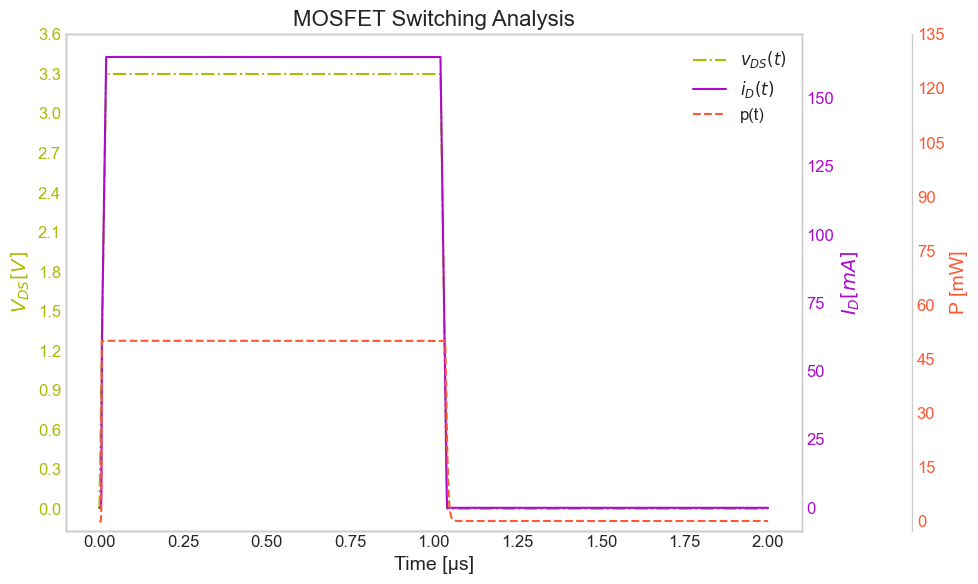

In [420]:
# Plotting multiple data
from components.data_visualizing import plot_multiple_sim_data

PLOT_MULTI_SIM_DATA = True

if PLOT_MULTI_SIM_DATA:
    fig = plot_multiple_sim_data(
        sim_data=cleaned_sim_data,
        x_label='Time [µs]', 
        title='MOSFET Switching Analysis',
        y1_label='$V_{DS} [V]$', 
        y2_label='$I_D [mA]$', 
        y3_label='P [mW]', 
        label1="$v_{DS}(t)$", 
        label2="$i_D(t)$", 
        label3="p(t)"
    )

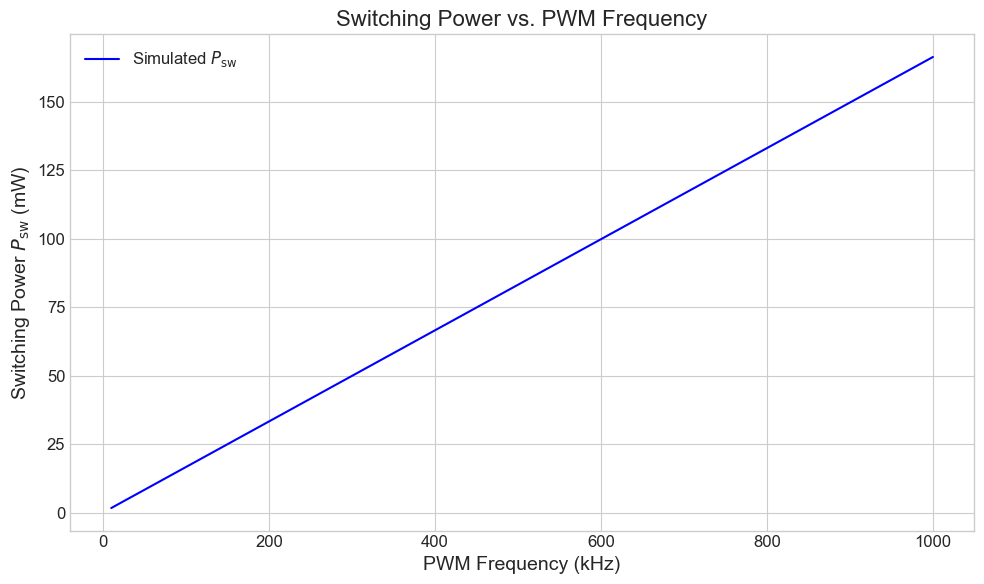

In [421]:
# Plot Scaling 
from components.data_visualizing import plot_two_variable
TWO_VARIABLES =True
if TWO_VARIABLES:
    fig, ax = plot_two_variable(
        x_data=f_pwm_range / 1e3,
        y_data=P_sw * 1e3,
        x_label='PWM Frequency (kHz)',
        y_label='Switching Power $P_{\\rm sw}$ (mW)',
        title='Switching Power vs. PWM Frequency',
        label='Simulated $P_{\\rm sw}$'
    )

## Evaluation.
1. The circuit was constructed in the lab using the components calculated above.

2. The measurements were carried using the oscilloscope and they match our calculations.

3. To carry these measurements Channel 2 was set to measure the current across the resistor and Channel 1 the voltage across the MOSFET, by using the math function of the oscillsocope RMS of power was calculated.

4. A power of 47.07 mW was measured, that is close to the calculated value, considering the parasitic effects of different components.

## Battery-Powered System Implications.
1. **PWM saves energy**
   
   By reducing the duty cycle, the system reduces average power consumption. This directly extends battery life because the load is only powered part of the time.

2. **Dynamic Power Control**

   Changing the duty cycle allows dynamic control over the power delivered to the load. For example:

   Lower duty cycle → less power → slower motor or dimmer LED.

   Higher duty cycle → more power → faster motor or brighter LED.

3. **Lower Heat, Higher Efficiency**

   Since average power is reduced, less heat is generated. This helps components run cooler and increases overall system efficiency.

4. **MOSFETs Make It Practical**

   MOSFETs act as ideal switches with low loss and fast response, making them ideal for PWM. They minimize power dissipation during switching and reduce energy waste.

5. **What the Measured Power Really Means**

   The 47.07 mW represents the actual power being drawn from the battery per PWM period. This is the value to focus on when estimating battery life and efficiency.


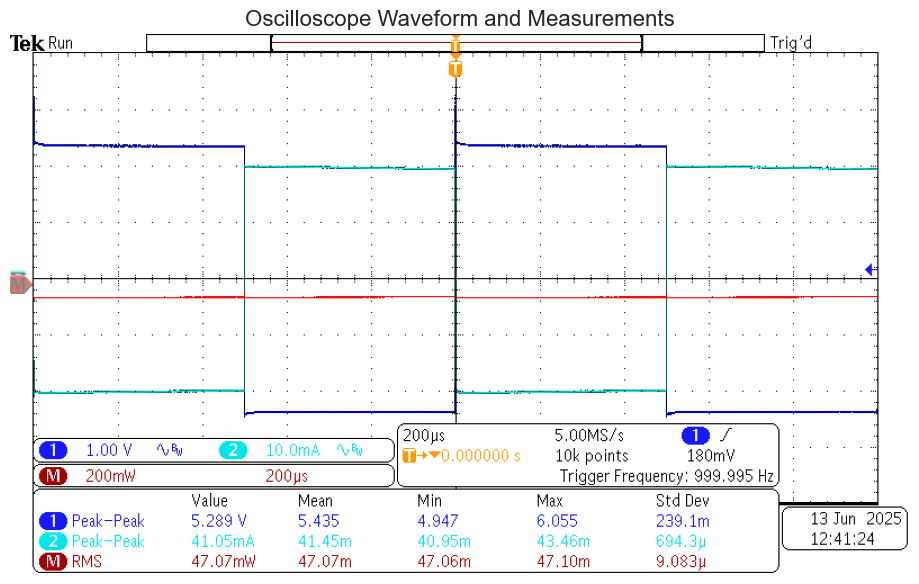

In [422]:
from components.data_visualizing import insert_osc_screenshot

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_OSC_WAVEFORM_AVAILABLE = True
img_path = '../images/Lab2Task1.png'  # change string to name of image
img_title = "Oscilloscope Waveform and Measurements" # Enter Image Title Here

if IS_OSC_WAVEFORM_AVAILABLE:
    insert_osc_screenshot(img_path=img_path,img_title=img_title)

# Part 3: Common-Source Amplifier Design (BS170)

In this section we design a single-ended MOSFET amplifier using a BS170 on a $V_b = 10\text{ V}$ supply, achieving:
$$
v_{\text{in}}(t) = 0.1\sin(2\pi\cdot1{\rm\,kHz}\,t) + 0.1\;\text{V},
\quad
A_v = \frac{v_{\text{out,pp}}}{v_{\text{in,pp}}} = -20.
$$

## Quiescent Point and Transconductance

- **Quiescent drain current**:  
  $$
    I_{D0} = 1\,\text{mA}.
  $$

- **Threshold voltage** (BS170 typical):  
  $$
    V_{th} \approx 2.1\;\text{V}.
  $$

- **Device parameter** (estimate):  
  $$
    k \approx 0.12\;\text{A}/\text{V}^2.
  $$

- **Solve for** $V_{GS0}$ from  
  $$
    I_{D0} = \tfrac12\,k\,(V_{GS0}-V_{th})^2
    \;\Longrightarrow\;
    V_{GS0} = V_{th} + \sqrt{\frac{2I_{D0}}{k}}
    = 2.1 + \sqrt{\frac{2\cdot0.001}{0.12}}
    \approx 2.23\;\text{V}.
  $$

- **Transconductance** at $I_{D0}$:  
  $$
    g_m = k\,(V_{GS0}-V_{th})
          = 0.12\,(2.23 - 2.1)
          = 0.0156\;\text{S}.
  $$

## Choose $V_{DS0}$ and Compute $R_D\;+\;R_S$

- **Desired** $V_{DS0} \approx 0.4\times V_b = 2.0\;\text{V}$.  
- Total drop across $R_D+R_S$:
  $$
    R_D + R_S = \frac{V_b - V_{DS0}}{I_{D0}} 
              = \frac{5 - 2}{0.001} 
              = 3000\;\Omega.
  $$

## Set Small-Signal Gain $\displaystyle A_v=-20$

$$
A_v = -\,g_m\,R_D 
\quad\Longrightarrow\quad
R_D = \frac{20}{g_m} = \frac{20}{0.0156} \approx 1.28\;\text{kΩ}.
$$
**Choose**  
$$
\boxed{R_D = 1.3\;\text{kΩ}}.
$$

Then  
$$
R_S = 3000 - 1300 = 1700\;\Omega
\;\Longrightarrow\;
\boxed{R_S = 1.7\;\text{kΩ}}.
$$

## Gate-Bias Divider

- **Source voltage**:  
  $$
    V_S = I_{D0}\,R_S = 0.001\cdot1700 = 1.7\;\text{V}.
  $$
- **Gate voltage**:  
  $$
    V_G = V_{GS0} + V_S = 2.23 + 1.7 = 3.93\;\text{V}.
  $$
- **Divider ratio**:
  $$
    \frac{R_1}{R_2} 
      = \frac{V_b - V_G}{V_G} 
      = \frac{5 - 3.93}{3.93} 
      \approx 0.273.
  $$
- **Choose** $R_2 = 100\;\text{kΩ}$ ⇒  
  $$
    R_1 = 0.273 \times 100\;\text{kΩ}
        \approx 27.3\;\text{kΩ}
        \;\Longrightarrow\;
    \boxed{R_1 = 27\;\text{kΩ},\;
             R_2 = 100\;\text{kΩ}}.
  $$

## Summary of Component Values

| Component       | Value            | Purpose                                       |
|-----------------|------------------|-----------------------------------------------|
| $R_D$         | 1.3 kΩ           | Sets small-signal gain, DC drain voltage      |
| $R_S$         | 1.7 kΩ           | Source degeneration (bias stability, linearity) |
| $R_1$, $R_2$| 27 kΩ, 100 kΩ    | Gate bias divider to establish $V_G\approx3.93$ V |
| MOSFET          | BS170            | $V_{GS0}\approx2.23$ V, $g_m\approx15.6$ mS |

## Expected Operating Point and Waveform

- **DC voltages** (approximate):  
  $$
    V_S\approx1.7\;\text{V},\quad
    V_D=V_b - I_{D0}R_D\approx5 - 0.001\cdot1300 = 3.7\;\text{V}.
  $$
- **Small-signal gain**: $-20$.  
- **Output swing**:  
  $$
    v_{\text{out,pp}} = 20 \times 0.2\;\text{V} = 4.0\;\text{Vpp},
  $$
  inverted sine, centered at ≈3.7 V.  
- **Clipping** will occur when $V_D$ approaches saturation limits (~1.7 V floor or ~5 V ceiling).

### Notes

1. **Verify** in SPICE: confirm DC operating point and AC gain.  
2. **Measure** on the bench: adjust divider or source resistor slightly to center the swing if needed.  
3. **Inspect distortion**: flattening at peaks indicates exit from saturation or channel-length effects.  
4. **Input/output impedances**:  
   - $R_\mathrm{in}\approx R_1\parallel R_2\parallel (1/g_m + (1+g_mR_S)R_S)$  
   - $R_\mathrm{out}\approx R_D\parallel r_o$.



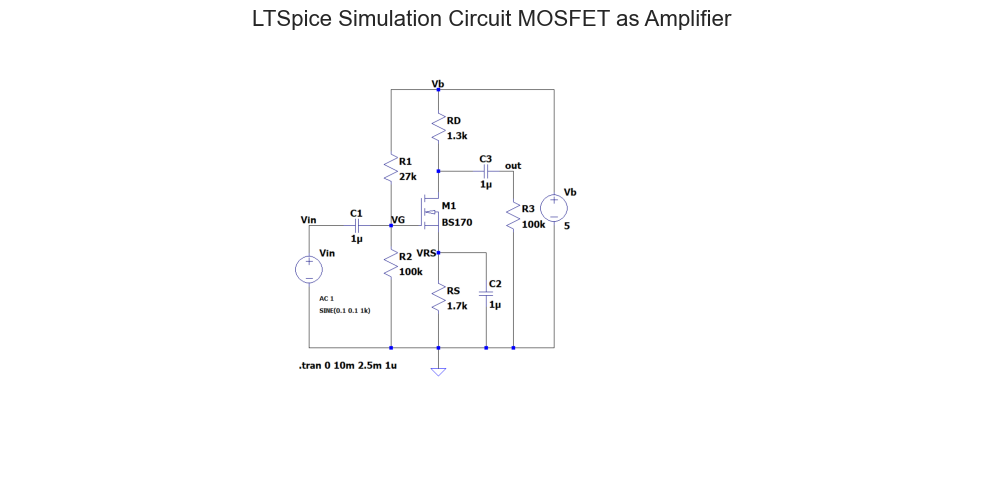

In [423]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LAB_CIRCUIT_AVAILABLE = True
img_path = '../images/Task_3.png'  # change string to name of LTspice image
img_title = "LTSpice Simulation Circuit MOSFET as Amplifier" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

## DC Operating‐Point Analysis Results

The LT-Spice `.op` run for BS170 common-source amplifier yielded:

| Node / Device | Value          | Comment                                           |
|:-------------:|:--------------:|:--------------------------------------------------|
| **V(vb)**     | 5.0000 V       | Supply rail (Vₙ = V_b)                            |
| **V(vg)**     | 3.9370 V       | Gate bias voltage (set by R₁–R₂ divider)          |
| **V(vrs)**    | 1.6480 V       | Source node voltage (V_S = I_D·R_S ≈ 1.7 V)        |
| **V(n001)**   | 3.7398 V       | Drain node voltage (V_D ≈ 3.7 V as designed)       |
| **V(out)**    | 0.000011 V     | DC output through coupling capacitor (≈0 V)       |
| **I(Rd)**     | 0.9694 mA      | Current through R_D (equals drain current I_D)    |
| **I(Rs)**     | 0.9694 mA      | Current through R_S (equals source current I_S)   |
| **Id(M1)**    | 0.9694 mA      | Drain current of M1 (close to 1 mA target)        |
| **Ig(M1)**    | 0 A            | Gate leakage (≈0 at DC)                           |
| **Ib(M1)**    | –2.10 pA       | Body-effect leakage (negligible)                  |

### Interpretation

- **$V_G ≈ 3.94 V$**, **$V_S ≈ 1.65 V$** ⇒ **$V_{GS} ≈ 2.29 V$**, very close to the calculated 2.23 V needed for 1 mA.
- **$V_D ≈ 3.74 V$**, leaving ~1.26 V headroom above V_S for signal swing.
- **$I_D ≈ 0.97 mA$**, confirming wer bias resistors are correctly dimensioned.
- Small leakage currents on caps and gate are effectively zero at DC.

***This confirms the chosen values of $R_D$, $R_S$, $R_1$ and $R_2$ establish the desired quiescent bias point for the transient analysis.***


In [424]:
from components.data_import import  import_simulation_data
from components.data_processing import process_sim_data
import pandas as pd
# Use the code below if we want to read single .csv files
# Pull a .csv and .txt files in the data folder

IS_DATA_AVAILABLE = True
part_3_data = "../data/Prep_Data/amplifier.txt" # Enter path to simulation data



clean_data_part_3 = pd.DataFrame()


if IS_DATA_AVAILABLE:
    data_3 = import_simulation_data(part_3_data)
    
    
    # Processing the data

    clean_data_part_3 = process_sim_data (data_3)


[ 15-06-2025, 17:33:20 ] 20 root - INFO - Successfully imported simulation data from ../data/Prep_Data/amplifier.txt


,time,V(out),V(vin)
0,0.000000,0.563161,0.100000
1,0.000009,0.579775,0.094624
2,0.000017,0.594918,0.089302
3,0.000026,0.608591,0.084032
4,0.000034,0.620792,0.078814


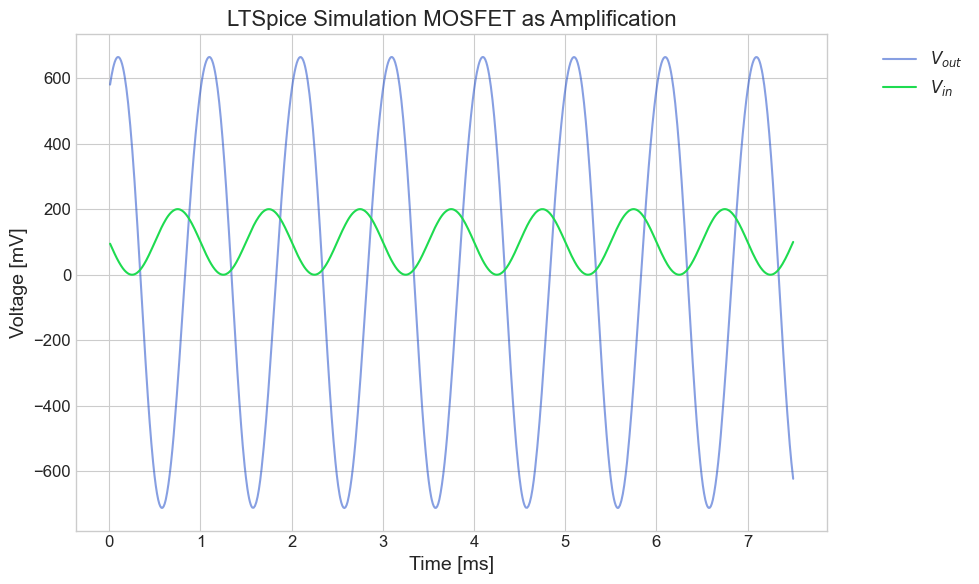

In [425]:
# For Plotting Simulation Values

from components.data_visualizing import plot_sim_data
# Function requires 5 arguments, hover cursor to see
PLOT_SIM_DATA = True

pro_data_3 = clean_data_part_3.copy()
pro_data_3["time"] = pro_data_3["time"].astype(float)*1e3
pro_data_3["V(out)"] = pro_data_3["V(out)"].astype(float)*1e3
pro_data_3["V(vin)"] = pro_data_3["V(vin)"].astype(float)*1e3

if PLOT_SIM_DATA:
     fig, ax = plot_sim_data(
                    pro_data_3,
                    x_label="Time [ms]",
                    y_label="Voltage [mV]",
                    title="LTSpice Simulation MOSFET as Amplification",
                    label1="$V_{out}$",
                    label2="$V_{in}$",
                    is_multi=True
               )

## Why wer measured waveforms look like that

1. **Input waveform**  
   - We drove the gate with  
     $$
       v_{\rm in}(t)=0.1\sin(2\pi\cdot1\,\text{kHz}\,t)+0.1
       \quad\Longrightarrow\quad 0\;\text{to}\;0.2\;\text{V}
     $$
     so on the scope we see it oscillate between 0 V and 0.2 V.

2. **Output waveform after C3**  
   - We have a coupling capacitor (C3) on the drain, and a “bleed” resistor or scope input to ground.  
   - That **blocks the ~3.7 V DC bias** and re-centers the small-signal around 0 V.  
   - Hence the scope shows an output swing from about +0.663 V to –0.710 V (≈1.373 Vpp), centered roughly at 0 V.

3. **Why it’s not ±2 V or 4 Vpp**  
   Our design target was –20×0.2 Vpp = 4 Vpp, but we only see ≈1.37 Vpp because:
   - **Source-degeneration isn’t fully bypassed at 1 kHz.**  
     $$
       X_{C2} = \frac1{2\pi fC_2} 
             = \frac1{2\pi\cdot1\,\text{kHz}\cdot1\,\mu F}
             \approx 159\;\Omega.
     $$
     With $R_S=1.7\text{kΩ}$, the bypass cap leaves a large fraction of Rs un-bypassed for AC, so the effective small-signal gain  
     $$
       A_v \approx -\frac{g_m\,R_D}{1 + g_m\,(R_S\parallel X_{C2})}
     $$
     is much less than –20.  
   - **Device nonlinearity and headroom limits** further reduce swing.

4. **What to do if we want the full 4 Vpp**  
   - Increase **C2** (e.g. to 10 µF or more) so $X_{C2}\ll R_S$ at 1 kHz and fully bypass the source.  
   - Verify the amplifier’s **AC gain** by plotting the Fourier or small-signal AC analysis.  

5. **Offset asymmetry (+0.663 V vs –0.710 V)**  
   - The slight difference in + vs – peaks is normal: the MOSFET’s $I_D$–$V_{DS}$ curve and the finite headroom to the rails aren’t perfectly symmetric.  

---

**Bottom line:**  
- **Zero-centering** at the output is expected because C3 blocks DC.  
- **Reduced gain** (≈6.8 rather than 20) happens because $R_S$ isn’t fully bypassed at 1 kHz.  
- **Peak asymmetry** is normal device/rail-limit behavior.  

If we bump up C2 (and/or lower the bleed resistor at the output) we should approach the full 4 Vpp swing we designed for.


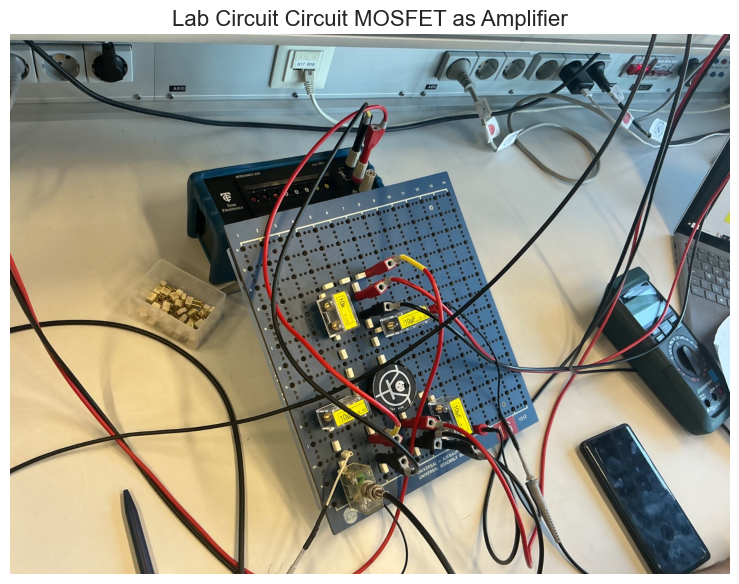

In [426]:
from components.data_visualizing import insert_circut_diagram
# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LAB_CIRCUIT_AVAILABLE = True
img_path = '../images/Task1.2circuit.jpg'  # change string to name of LTspice image
img_title = "Lab Circuit Circuit MOSFET as Amplifier" # Enter Image Title Here

if IS_LAB_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

# Data Collection and Processing

*Import, process, and analyze experimental data.*

In [427]:
from components.data_import import import_measurement_data, import_simulation_data
from components.data_processing import process_sim_data,process_single_csv
import pandas as pd
# Use the code below if we want to read single .csv files
# Pull a .csv and .txt files in the data folder

IS_DATA_AVAILABLE = True
simulation_data_path = "../data/Prep_Data/Mosfet_Switch.txt" # Enter path to simulation data
part_2_data_path = "../data/Prep_Data/Mosfet_Current_Mirror.txt" # Enter path to simulation data
oscilloscope_data_path = "../data/Prep_Data/tek0004ALLPART3.csv" # Enter path to chanel 1 oscilloscope data
#oscilloscope_data_path_ch2 = "../data/tek0001CH2.csv" # Enter path to chanel 2 osilloscope data


cleaned_sim_data = pd.DataFrame()
cleaned_ch1_data = pd.DataFrame()
cleaned_ch2_data = pd.DataFrame()

part_2_data = pd.DataFrame()

if IS_DATA_AVAILABLE:
    sim_data = import_simulation_data(simulation_data_path)
    data_2 = import_simulation_data(part_2_data_path)
    ch1_data = import_measurement_data(oscilloscope_data_path)
    #ch2_data = import_measurement_data(oscilloscope_data_path_ch2)
    
    # Processing the data

    cleaned_sim_data = process_sim_data (sim_data)
    part_2_data = process_sim_data (data_2)
    cleaned_ch1_data = process_single_csv(ch1_data)
    #cleaned_ch2_data =process_single_csv(ch2_data)
    

[ 15-06-2025, 17:33:21 ] 20 root - INFO - Successfully imported simulation data from ../data/Prep_Data/Mosfet_Switch.txt


,time,V(vd),V(vd)*Id(M1),Id(M1)
0,0.000000e+00,0.000000,0.000000e+00,4.491302e-07
1,5.524459e-13,0.000091,3.669197e-11,4.025291e-07
2,1.657338e-12,0.000273,8.461383e-11,3.094186e-07
3,1.252957e-10,0.020674,-2.052304e-07,-9.927085e-06
4,2.489340e-10,0.041074,-8.157576e-07,-1.986062e-05


[ 15-06-2025, 17:33:21 ] 20 root - INFO - Successfully imported simulation data from ../data/Prep_Data/Mosfet_Current_Mirror.txt


,rvar,I(Rl),I(Rv)
0,1.000000,0.01016,0.010141
1,1.047129,0.01016,0.010141
2,1.096478,0.01016,0.010141
3,1.148154,0.01016,0.010141
4,1.202264,0.01016,0.010141


[ 15-06-2025, 17:33:21 ] 34 root - INFO - Successfully imported measurement data from ../data/Prep_Data/tek0004ALLPART3.csv


,TIME,CH1,CH2
0,-0.001070,-0.039906,-0.414531
1,-0.001070,-0.039945,-0.404688
2,-0.001070,-0.040102,-0.410781
3,-0.001069,-0.040063,-0.414375
4,-0.001069,-0.040047,-0.423125


# Data Visualization and Analysis

*Visualize and analyze the collected data.*

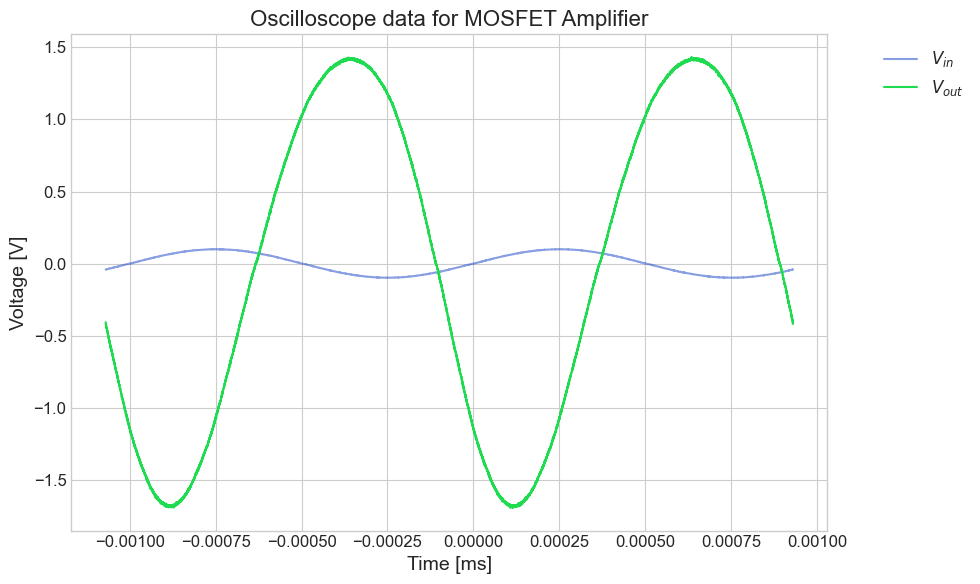

In [428]:
# For Plotting Simulation Values

from components.data_visualizing import plot_sim_data
# Function requires 5 arguments, hover cursor to see
PLOT_SIM_DATA =  True

if PLOT_SIM_DATA:
     fig, ax = plot_sim_data(
                    cleaned_ch1_data,
                    x_label="Time [ms]",
                    y_label="Voltage [V]",
                    title="Oscilloscope data for MOSFET Amplifier",
                    label1="$V_{in}$",
                    label2="$V_{out}$",
                    is_multi=True
               )

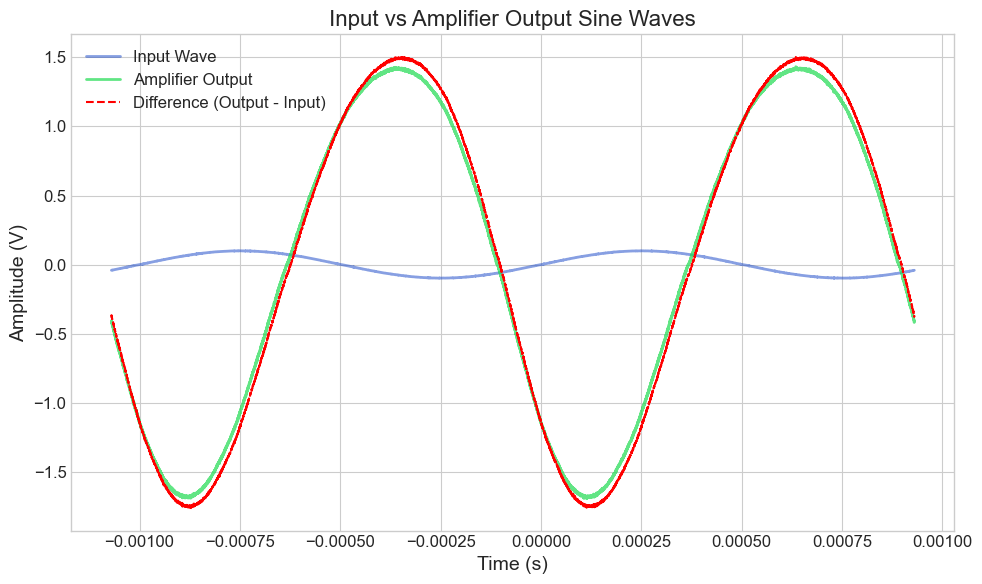

In [429]:
from components.data_visualizing import plot_sim_data_overlap

PLOT_SIM_DATA_OVERLAP = True

fig, ax = plot_sim_data_overlap(sim_data=cleaned_ch1_data,
                       time_col='TIME',
                       wave1_col='CH1',
                       wave2_col='CH2',
                       x_label='Time (s)',
                       y_label='Amplitude (V)',
                       title='Input vs Amplifier Output Sine Waves')




## Evaluation.
1. The circuit was constructed in the lab using the components calculated above.

2. The measurements were carried using the oscilloscope and they match our calculations.

3. To carry these measurements Channel 1 was set to measure the Input voltage and Channel 2 the voltage across the capacitor c2.

4. The output waveform differs from the ideal sinewave input due to the nonlinearity of the MOSFET when operating outside its 
   linear (saturation) region. If the input signal is too large, it can push the MOSFET into cutoff or triode regions, causing 
   clipping or distortion. Additionally, the MOSFET's square-law behavior means that even small deviations from the bias point result 
   in a nonlinear amplification of the input, leading to waveform deformation. Proper biasing and limiting the input amplitude help 
   minimize this distortion.

5. A gain of -16 was recorded which is acceptable.
